In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class KBandit():
  def __init__(self,k,mQ):
    self.k = k
    self.q = np.random.normal(mQ,1,k)
    self.optA = np.argmax(self.q)

  def env(self,at):
    r = np.random.normal(self.q[at],1)
    return r
  

In [3]:
sm = lambda a,H: np.exp(H[a]) / np.sum(np.exp(H))

class Agent():
  def __init__(self,nA,alfa):
    self.nA = nA # num actions
    self.alfa = alfa
    self.epsilon = 0
    self.H = np.ones(nA) # preferences
    self.T = 0
    self.mR = 0 # mean reward
    None
    
  def act(self):
    p = np.zeros(self.nA)
    for a in np.arange(self.nA):
      p[a] = sm(a,self.H)
    At = Amax = np.argmax(p)
    At = np.random.choice(self.nA,1,p=p)
    return At
  
  def up_mR(self,a,Rt):
    self.T += 1
    self.mR += (1/self.T)*(Rt-self.mR)
    
  def up_H(self,At,Rt): 
    # selected action (At)
    self.H[At] += self.alfa*(Rt-self.mR)*(1-sm(At,self.H))
    # other actions (At')
    aL = np.setdiff1d(np.arange(self.nA),At)
    for a in aL:
      self.H[a] -= self.alfa*(Rt-self.mR)*sm(a,self.H)
    return None
    


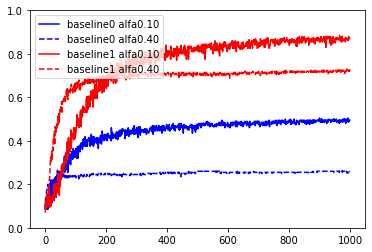

In [4]:
neps = 200
nsteps = 1000
D = 99*np.ones([neps,nsteps])
nA = k = 10
mQ = 4

for c,base in zip(['b','r'],[0,1]):
  for ls,alfa in zip(['-','--'],[0.1,0.4]):

    # loop over bandits
    for ep in range(neps):
      band = KBandit(k,mQ)
      ag = Agent(nA,alfa)
      # env loop
      for step in range(nsteps): 
        # act 
        At = ag.act()
        Rt = band.env(At)
        # update prefs
        if base:
          ag.up_mR(At,Rt)
        else:
          ag.mR=0
        ag.up_H(At,Rt)
        # record 
        D[ep,step] = int(At==band.optA)

    plt.plot(D.mean(0),c=c,ls=ls,label='baseline%i alfa%.2f'%(base,alfa))
plt.ylim(0,1)
plt.legend()

** note on action selection:
https://stats.stackexchange.com/questions/324973/gradient-bandit-algorithm-baseline